In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten
import torch

In [2]:
# Define the paths to your image folders
train_path = "C:/Users/hp/Documents/Mtech/GurNum/GurNum"
val_path = "C:/Users/hp/Documents/Mtech/GurNum/GurNum"

In [3]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path
# Set the image size
img_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, 'train', str(label))
     # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
             # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            # Append the image and label to the lists
            images.append(img)
            labels.append(label)
            
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('a_train.npy', images)
np.save('b_train.npy', labels)


In [4]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path
# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir_val, 'val\\', str(label))

    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            # Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)
# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('a_test.npy', images_val)
np.save('b_test.npy', labels_val)

In [5]:
# Load the dataset
a_train = np.load('a_train.npy')
b_train = np.load('b_train.npy')
a_test = np.load('a_test.npy')
b_test = np.load('b_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


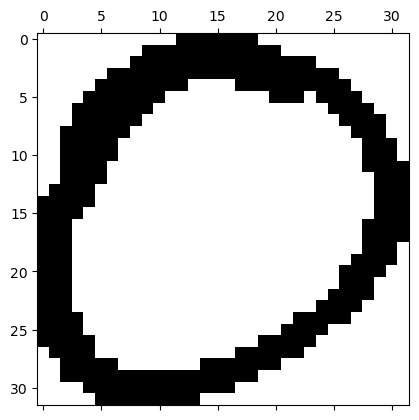

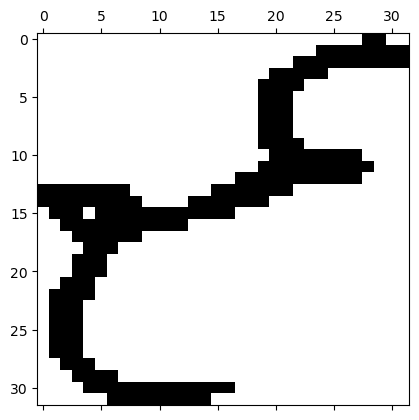

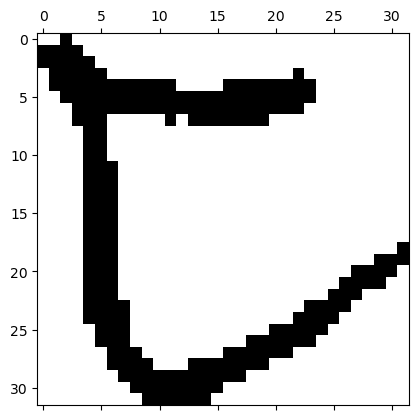

In [6]:
# test the images are loaded correctly
print(len(a_train))
print(len(a_test))
a_train[0].shape
a_train[0]
plt.matshow(a_train[0],cmap='gray')
plt.matshow(a_train[999],cmap='gray')
print(a_train.shape)
print(a_test.shape)
b_train
b_test
plt.matshow(a_test[150],cmap='gray')

In [7]:
model = keras.Sequential([keras.layers.Flatten(),
    keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
model.fit(a_train, b_train,epochs= 10, validation_data=(a_test, b_test))

Epoch 1/10
32/32 [==============================] - 1s 14ms/step - loss: 178.3330 - accuracy: 0.3440 - val_loss: 70.2457 - val_accuracy: 0.5281
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 25.0501 - accuracy: 0.7880 - val_loss: 31.2209 - val_accuracy: 0.7528
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 13.4273 - accuracy: 0.8560 - val_loss: 25.2241 - val_accuracy: 0.7640
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 8.7632 - accuracy: 0.9110 - val_loss: 15.9400 - val_accuracy: 0.8371
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 4.2064 - accuracy: 0.9390 - val_loss: 13.8757 - val_accuracy: 0.8539
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 3.5126 - accuracy: 0.9460 - val_loss: 12.9162 - val_accuracy: 0.8708
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 2.6675 - accuracy: 0.9560 - val_loss: 21.1160 - val_accuracy: 0.8427
Epoch 8/

In [8]:
a_train_scaled = a_train/255
a_test_scaled = a_test/255
model.fit(a_train_scaled, b_train,epochs= 10, validation_data=(a_test_scaled, b_test))

Epoch 1/10
32/32 [==============================] - 1s 12ms/step - loss: 0.8262 - accuracy: 0.8540 - val_loss: 1.0873 - val_accuracy: 0.7472
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.8375 - accuracy: 0.8420 - val_loss: 1.0323 - val_accuracy: 0.7865
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7875 - accuracy: 0.8720 - val_loss: 0.9866 - val_accuracy: 0.8090
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7507 - accuracy: 0.9070 - val_loss: 0.9538 - val_accuracy: 0.8371
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7238 - accuracy: 0.9250 - val_loss: 0.9285 - val_accuracy: 0.8539
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7025 - accuracy: 0.9460 - val_loss: 0.9116 - val_accuracy: 0.8539
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.9580 - val_loss: 0.8963 - val_accuracy: 0.8708
Epoch 8/10
32/32 [=

In [9]:
model.evaluate(a_test_scaled,b_test)


6/6 [==============================] - 0s 5ms/step - loss: 0.8670 - accuracy: 0.8876


[0.8669975399971008, 0.8876404762268066]

6/6 [==============================] - 0s 5ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


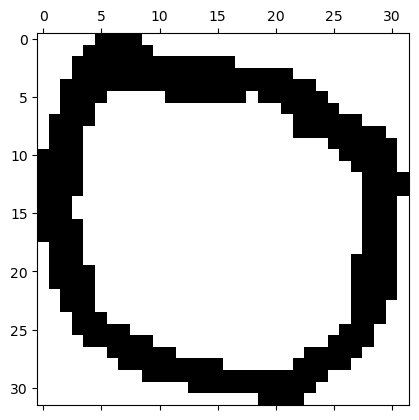

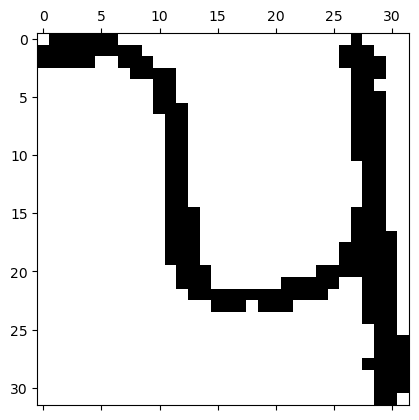

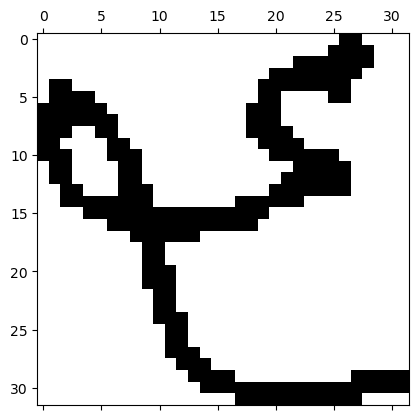

In [10]:
# predict 1st image
plt.matshow(a_test[0],cmap='gray')
b_predicted = model.predict(a_test_scaled)
b_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(b_predicted[0]))
# test some more values
plt.matshow(a_test[88],cmap='gray')
print('Predicted Value is ',np.argmax(b_predicted[88]))
plt.matshow(a_test[177],cmap='gray')
print('Predicted Value is ',np.argmax(b_predicted[177]))

In [11]:
# convert to concrete values
b_predicted_labels=[np.argmax(i) for i in b_predicted]
print(b_predicted_labels, len(b_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=b_test, predictions=b_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 1, 1, 1, 1, 1, 4, 1, 7, 1, 7, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 7, 2, 2, 9, 3, 2, 3, 3, 3, 2, 3, 2, 3, 8, 3, 3, 3, 2, 3, 3, 3, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  1,  0,  0,  5,  0,  0],
       [ 0,  1, 14,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  4, 12,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  0, 17,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  0, 18]])>

Text(95.72222222222221, 0.5, 'Actual')

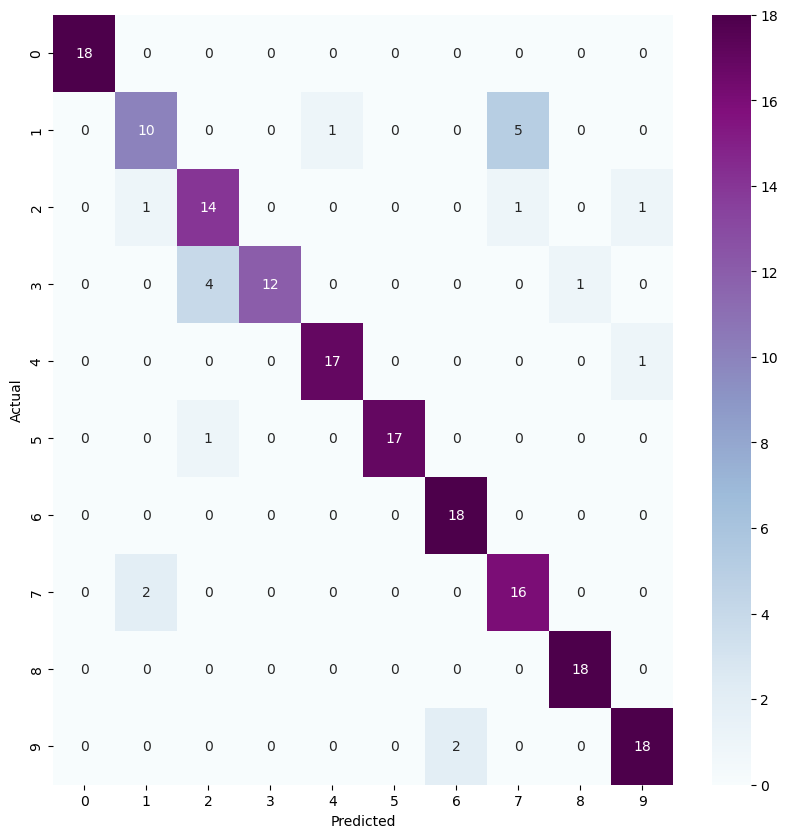

In [12]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d',cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [13]:
model2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
# compile the nn
model2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
history = model2.fit(a_train_scaled, b_train,epochs= 10, validation_data=(a_test_scaled, b_test))

Epoch 1/10
32/32 [==============================] - 2s 34ms/step - loss: 1.2000 - accuracy: 0.7040 - val_loss: 0.6422 - val_accuracy: 0.7921
Epoch 2/10
32/32 [==============================] - 1s 26ms/step - loss: 0.1946 - accuracy: 0.9460 - val_loss: 0.3591 - val_accuracy: 0.9101
Epoch 3/10
32/32 [==============================] - 1s 26ms/step - loss: 0.1537 - accuracy: 0.9420 - val_loss: 0.2543 - val_accuracy: 0.9326
Epoch 4/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0730 - accuracy: 0.9760 - val_loss: 0.2542 - val_accuracy: 0.9494
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0389 - accuracy: 0.9940 - val_loss: 0.1980 - val_accuracy: 0.9494
Epoch 6/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0236 - accuracy: 0.9990 - val_loss: 0.1880 - val_accuracy: 0.9494
Epoch 7/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.2065 - val_accuracy: 0.9382
Epoch 8/10
32

In [14]:
# evaluate test dataset on modified model
model2.evaluate(a_test_scaled,b_test)

6/6 [==============================] - 0s 10ms/step - loss: 0.2057 - accuracy: 0.9494


[0.2057231366634369, 0.949438214302063]

In [15]:
# build confusion matrix to see how our prediction looks like
# convert to concrete values
b_predicted = model2.predict(a_test_scaled)
b_predicted[0]
b_predicted_labels=[np.argmax(i) for i in b_predicted]
print(b_predicted_labels, len(b_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=b_test, predictions=b_predicted_labels)
conf_mat

6/6 [==============================] - 0s 6ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  1,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

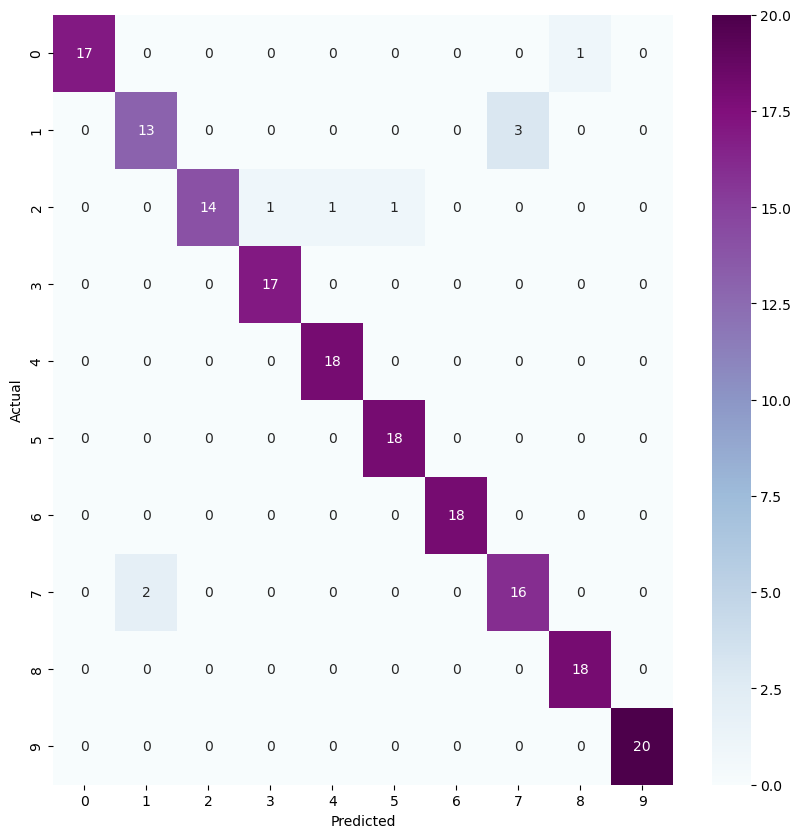

In [16]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d',cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 4ms/step - loss: 16.6113 - accuracy: 0.8708
Test accuracy: 0.8707864880561829


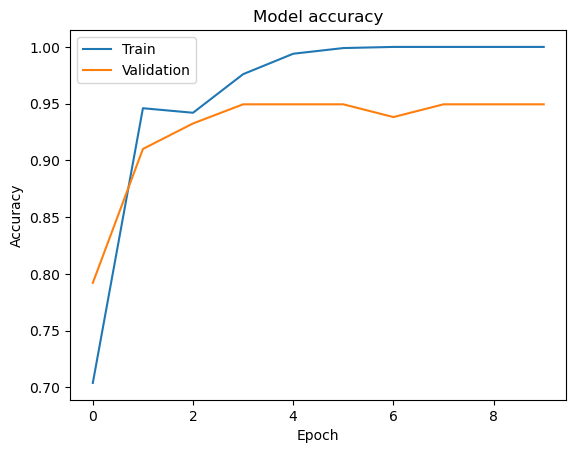

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(a_test, b_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()